# Hole filling

In [1]:
import os
import numpy as np

In [2]:
from tinymesh import Mesh, implicit_fairing, remesh_triangular, hole_fill_min_dihedral, hole_fill_advancing_front
from viewer import Viewer

## Load mesh file

In [3]:
models_dir = "../../data/models"
filename = os.path.join(models_dir, "bunny.ply")
mesh = Mesh(filename)

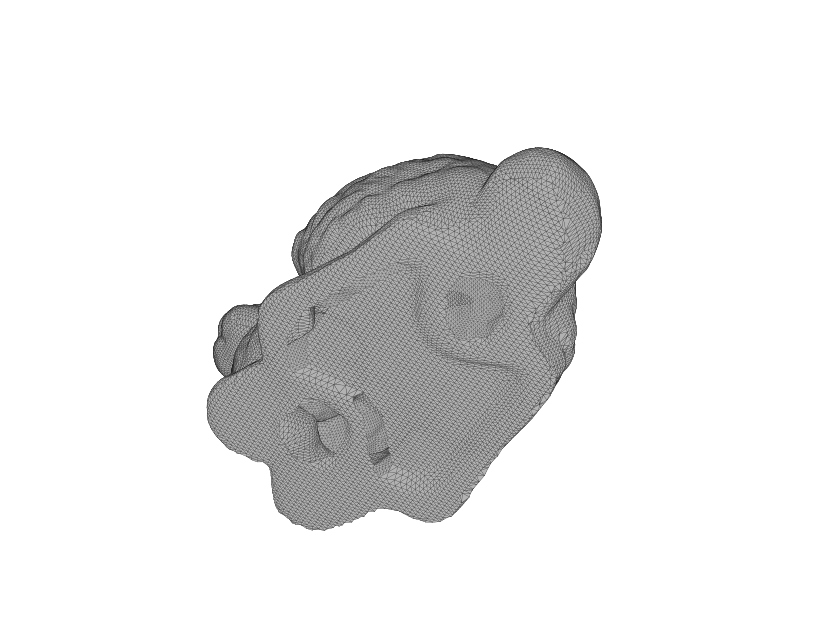

In [4]:
viewer = Viewer(800, 600)
viewer.lookat(1, -4, 1, 0, 0, 0, 0, 1, 0)
viewer.perspective(45, viewer.aspect, 1, 100)
viewer.mesh_visualization(mesh)

## Hole filling (minimize dihedral angles)

In [5]:
# Freeze non-hole vertices
mesh = Mesh(filename)
for i in range(mesh.num_vertices()):
    v = mesh.vertex(i)
    v.lock()

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


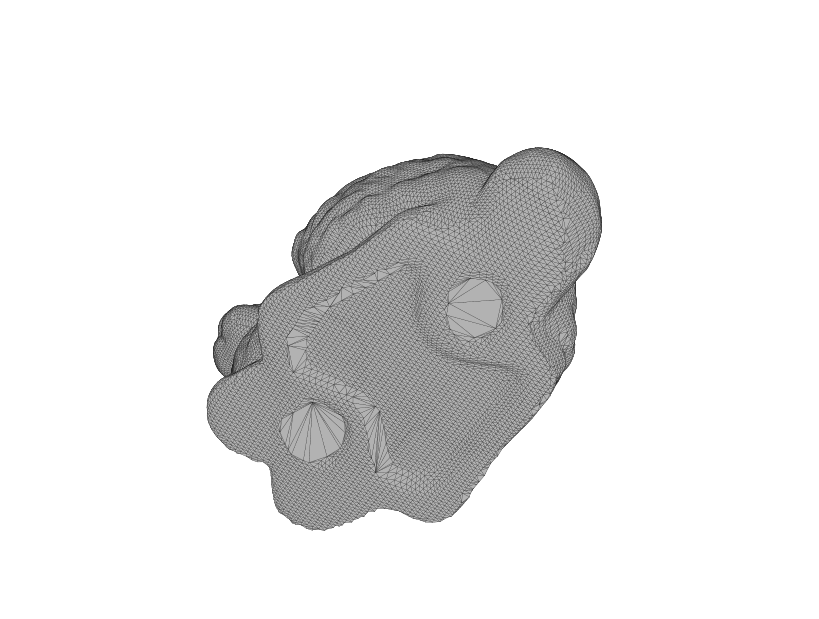

In [6]:
# Fill holes
for i in range(mesh.num_faces()):
    f = mesh.face(i)
    if f.is_hole():
        hole_fill_min_dihedral(mesh, f)
viewer.mesh_visualization(mesh)

### Remesh filled regions

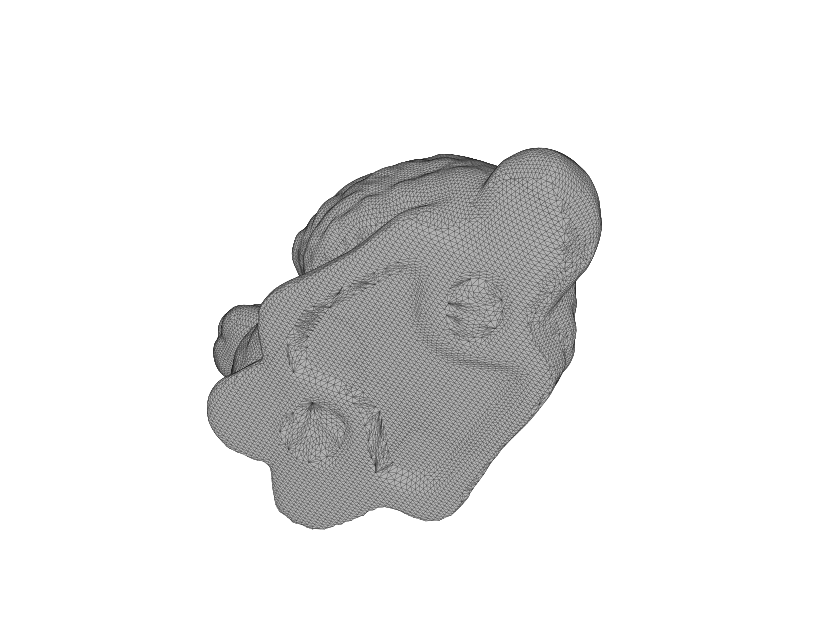

In [7]:
remesh_triangular(mesh, short_length=0.5, long_length=2.0)
implicit_fairing(mesh)
viewer.mesh_visualization(mesh)

## Hole filling (advancing front)

In [8]:
# Load mesh
mesh = Mesh(filename)

In [ ]:
# Fill holes
faces = []
for i in range(mesh.num_faces()):
    f = mesh.face(i)
    if f.is_hole():
        hole_fill_advancing_front(mesh, f)

viewer.mesh_visualization(mesh)